In this project we will learn how to import data directly from Google/Yahoo finance website and fit the data in a dataframe

In [1]:
import pandas as pd
import numpy as np
from pandas_datareader import data, wb
import datetime
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import cufflinks as cf
from plotly import __version__
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
import cufflinks as cf
cf.go_offline()

Using datetime to set start and end datetime objects.

In [2]:
start = datetime.datetime(2006,1,1)
end = datetime.datetime(2016,1,1)

Getting stock information for below banks using datareader feature:
- Bank of America
- CitiGroup
- Goldman Sachs
- JPMorgan Chase
- Morgan Stanley
- Wells Fargo

In [3]:
BAC = data.DataReader('BAC', 'yahoo', start, end)
C = data.DataReader('C', 'yahoo', start, end)
GS = data.DataReader('GS', 'yahoo', start, end)
JPM = data.DataReader('JPM', 'yahoo', start, end)
MS = data.DataReader('MS', 'yahoo', start, end)
WFC = data.DataReader('WFC', 'yahoo', start, end)

In [4]:
tickers = ['BAC', 'C', 'GS','JPM','MS','WFC']

Using concat function to create a single dataframe for all the bank stock details

In [5]:
bank_stocks = pd.concat([BAC,C,GS,JPM,MS,WFC], keys = tickers, axis = 1)

Giving names to the column of tickers and stock categories

In [6]:
bank_stocks.columns.names = ['Bank Ticker', 'Stock Info']

In [30]:
bank_stocks.head()

Bank Ticker        BAC                                               \
Stock Info        High        Low       Open      Close      Volume   
Date                                                                  
2006-01-03   47.180000  46.150002  46.919998  47.080002  16296700.0   
2006-01-04   47.240002  46.450001  47.000000  46.580002  17757900.0   
2006-01-05   46.830002  46.320000  46.580002  46.639999  14970700.0   
2006-01-06   46.910000  46.349998  46.799999  46.570000  12599800.0   
2006-01-09   46.970001  46.360001  46.720001  46.599998  15619400.0   

Bank Ticker                      C                                      ...  \
Stock Info   Adj Close        High         Low        Open       Close  ...   
Date                                                                    ...   
2006-01-03   35.054218  493.799988  481.100006  490.000000  492.899994  ...   
2006-01-04   34.681938  491.000000  483.500000  488.600006  483.799988  ...   
2006-01-05   34.726604  487.799988  484.000000  484.399994  486.200012  ...   
2006-01-06   34.674480  489.000000  482.000000  488.799988  486.200012  ...   
2006-01-09   34.696808  487.399994  483.000000  486.000000  483.899994  ...   

Bank Ticker         MS                                         WFC             \
Stock Info        Open      Close     Volume  Adj Close       High        Low   
Date                                                                            
2006-01-03   57.169998  58.310001  5377000.0  37.429329  31.975000  31.195000   
2006-01-04   58.700001  58.349998  7977800.0  37.455013  31.820000  31.365000   
2006-01-05   58.549999  58.509998  5778000.0  37.557716  31.555000  31.309999   
2006-01-06   58.770000  58.570000  6889800.0  37.596241  31.775000  31.385000   
2006-01-09   58.630001  59.189999  4144500.0  37.994202  31.825001  31.555000   

Bank Ticker                                               
Stock Info        Open      Close      Volume  Adj Close  
Date                                                      
2006-01-03   31.600000  31.900000  11016400.0  20.408512  
2006-01-04   31.799999  31.530001  10870000.0  20.171795  
2006-01-05   31.500000  31.495001  10158000.0  20.149401  
2006-01-06   31.580000  31.680000   8403800.0  20.267757  
2006-01-09   31.674999  31.674999   5619600.0  20.264565  

[5 rows x 36 columns]

Lets use the multi-indexing feature of python to study the stats behind our data with the help of .xs function

In [7]:
#what is the max close price for all the bank stocks in any year.

bank_stocks.xs('Close', level = 'Stock Info', axis = 1) 

#this only gives the close price of all the bank stocks for all the years. We will use the max function.

bank_stocks.xs('Close', level = 'Stock Info', axis = 1).max()

Bank Ticker
BAC     54.900002
C      564.099976
GS     247.919998
JPM     70.080002
MS      89.300003
WFC     58.520000
dtype: float64

In [8]:
#Now creating an empty dataframe that should contain the percentage change of all bank stocks

returns = pd.DataFrame()

We can use pandas pct_change() method on the Close column to create a column representing this return value

In [9]:
for tick in tickers:
    returns[tick + ' Return'] = bank_stocks[tick]['Close'].pct_change()

In [36]:
returns.head()

,BAC Return,C Return,GS Return,JPM Return,MS Return,WFC Return
Date,,,,,,
2006-01-03,NaN,NaN,NaN,NaN,NaN,NaN
2006-01-04,-0.010620,-0.018462,-0.013812,-0.014183,0.000686,-0.011599
2006-01-05,0.001288,0.004961,-0.000393,0.003029,0.002742,-0.001110
2006-01-06,-0.001501,0.000000,0.014169,0.007046,0.001025,0.005874
2006-01-09,0.000644,-0.004731,0.012030,0.016242,0.010586,-0.000158


Creating a pairplot using seaborn of the returns dataframe to identify which stocks stand out.

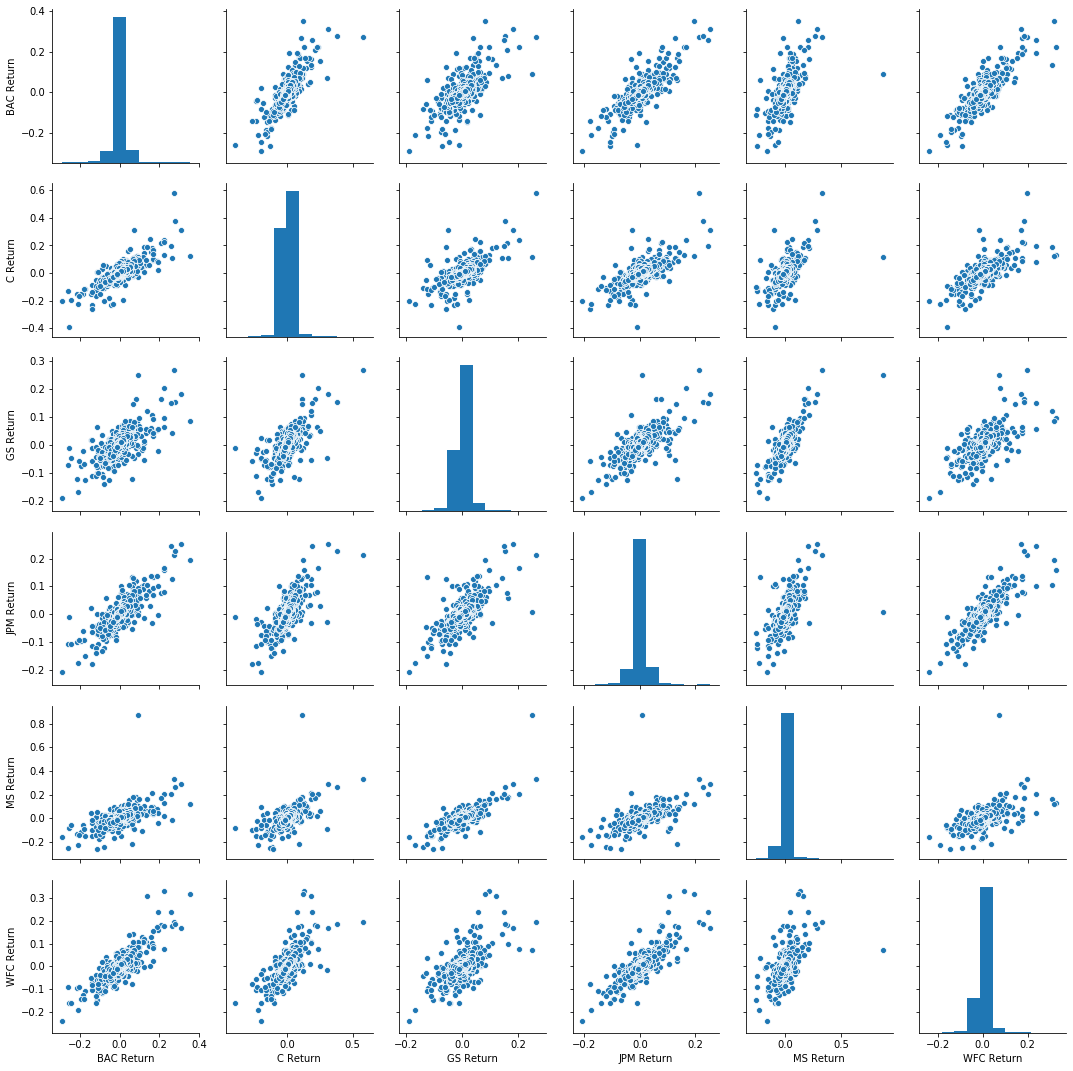

In [39]:
#since first row has all the values as null, hence we will use slicing function of python to start from the 2nd row
sns.pairplot(data=returns[1:])

Now lets see that on which dates the bank stocks had the best and the worst returns in a single day and see if can identify a pattern

In [41]:
returns.idxmin()
#idxmin and idxmax functions are used to find the timestamps of the lowest and highest values respectively

BAC Return   2009-01-20
C Return     2009-02-27
GS Return    2009-01-20
JPM Return   2009-01-20
MS Return    2008-10-09
WFC Return   2009-01-20
dtype: datetime64[ns]

In [42]:
returns.idxmax()

BAC Return   2009-04-09
C Return     2008-11-24
GS Return    2008-11-24
JPM Return   2009-01-21
MS Return    2008-10-13
WFC Return   2008-07-16
dtype: datetime64[ns]

From above we can see that 20th Jan 2009 is the date for most of the banks in terms of lowest stocks. Also, notice that for MS, the biggest drop and biggest gain happens in the time period of 4 days. I know why but you should google yourself. Something significant happened during that time. Only when you can corelate things with real life scenaris is when you can understand the beauty of data. ;)

In [43]:
 #lets see the standard deviation of the returns of all bank stocks
returns.std()

BAC Return    0.036647
C Return      0.038672
GS Return     0.025390
JPM Return    0.027667
MS Return     0.037819
WFC Return    0.030238
dtype: float64

In [48]:
#if you want to find out the standard deviation for a certain time peiod
returns.loc['2015-01-01':'2015-12-31'].std()

BAC Return    0.016163
C Return      0.015289
GS Return     0.014046
JPM Return    0.014017
MS Return     0.016249
WFC Return    0.012591
dtype: float64

Lets create some visuals using the dataframes and various columns(banks) and rows (time)

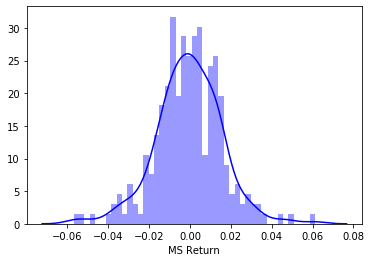

In [53]:
#distribution plot for MS Returns for 2015
sns.distplot(returns.loc['2015-01-01':'2015-12-31']['MS Return'], color = 'Blue', bins = 45)

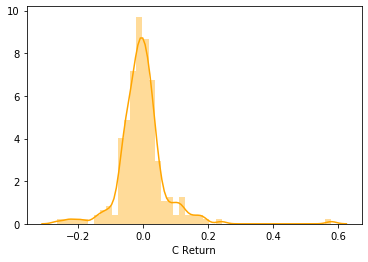

In [58]:
#Why I did a distribution plot for CitiGroup during 2008?
#That was because Citigroup suffered a major loss of 10B during the financial crisis of 2008.
#That we can do from the distribution graph since C Return has a outlier of .6 which is 10 times more than the MS return.

sns.distplot(returns.loc['2008-01-01':'2008-12-31']['C Return'], color = 'Orange', bins = 45)

Now lets create a graph that as per me is the least exciting one but shows a remarkable information when it comes to timeline of stocks, LINE GRAPH. Also we see such graphs in the movies as well so might be facinating for some finance guys out there.

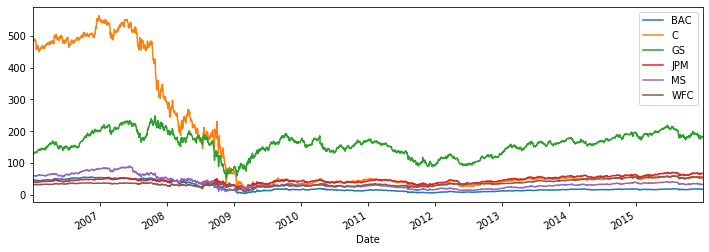

In [59]:
#There are three ways of doing it.1. For Loop

for tick in tickers:
    bank_stocks[tick]['Close'].plot(label = tick, figsize = (12,4))

plt.legend()

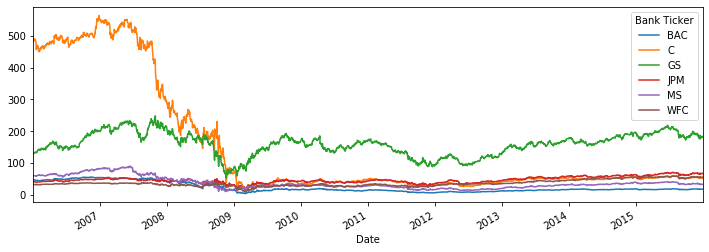

In [61]:
#2. .xs method
bank_stocks.xs(key='Close', axis =1, level='Stock Info').plot(figsize=(12,4))

In [11]:
#3. Plotly method
bank_stocks.xs(key='Close', axis =1, level='Stock Info').iplot()

Lets calculate plot and compare the moving average of the BAC bank against the close price of BAC for 2008. We are doing this to identify the difference in fluctuations of the stock price (closed) and also to explore the rolling feature in Python

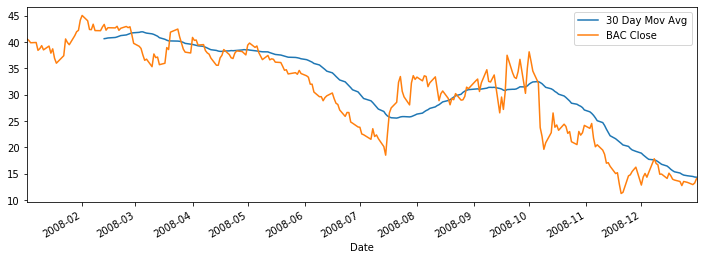

In [26]:
plt.figure(figsize=(12,4))
BAC['Close'].loc['2008-01-01':'2009-01-01'].rolling(window=30).mean().plot(label='30 Day Mov Avg')
BAC['Close'].loc['2008-01-01':'2009-01-01'].plot(label='BAC Close')
plt.legend()

Lets see the correlation between the stocks closing prices with the help of a heatmap (best plot to show correlation)

In [18]:
bank_stocks.xs(key = 'Close', axis = 1, level = 'Stock Info').corr()

Bank Ticker,BAC,C,GS,JPM,MS,WFC
Bank Ticker,,,,,,
BAC,1.000000,0.971516,0.550898,0.103874,0.944218,0.008542
C,0.971516,1.000000,0.434123,0.003515,0.933609,-0.068536
GS,0.550898,0.434123,1.000000,0.685286,0.683792,0.499897
JPM,0.103874,0.003515,0.685286,1.000000,0.250427,0.940269
MS,0.944218,0.933609,0.683792,0.250427,1.000000,0.131835
WFC,0.008542,-0.068536,0.499897,0.940269,0.131835,1.000000


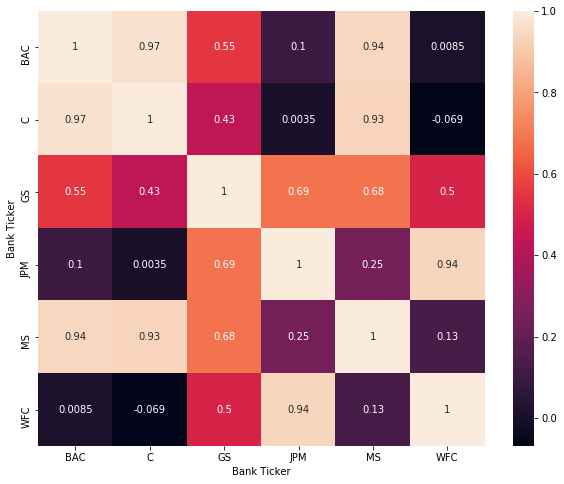

In [30]:
plt.figure(figsize =(10,8))
sns.heatmap(bank_stocks.xs(key = 'Close', axis = 1, level = 'Stock Info').corr(), annot = True)

Lets see how seaborn clusters the bank stocks based on the closing price using a cluster map and candle map

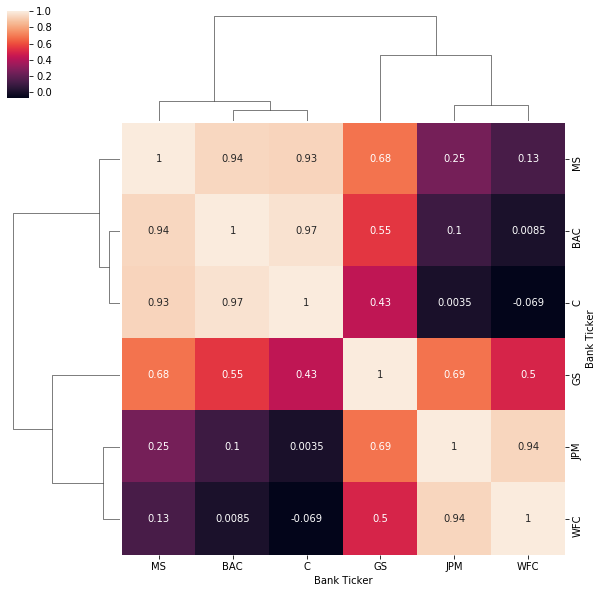

In [21]:
sns.clustermap(bank_stocks.xs(key = 'Close', axis = 1, level = 'Stock Info').corr(), annot = True)

Cufflinks and Plotly is specifically used to show the financial data in order to show the decrease and increase in financials. Lets see how we can use it to know the BAC stock details for 2015 using candle map of plotly and cufflinks

In [22]:
BAC.head()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2006-01-03,47.180000,46.150002,46.919998,47.080002,16296700.0,35.054218
2006-01-04,47.240002,46.450001,47.000000,46.580002,17757900.0,34.681938
2006-01-05,46.830002,46.320000,46.580002,46.639999,14970700.0,34.726604
2006-01-06,46.910000,46.349998,46.799999,46.570000,12599800.0,34.674480
2006-01-09,46.970001,46.360001,46.720001,46.599998,15619400.0,34.696808


In [25]:
BAC15= BAC[['Open', 'High', 'Low', 'Close']].loc['2015-01-01':'2016-01-01']
BAC15.iplot(kind = 'candle')

Lets create a simple moving average plot of one of the bank stocks for any year to explore the data.

In [35]:
MS['Close'].loc['2015-01-01':'2016-01-01'].ta_plot(study='sma', periods=[15,25,67])
#ta is an inbuilt plot function which stands for technical analysis. We can use it when we need to use mathematical
#and statistical formulas inside the plot itself.

Lets see how can we visualize standard deviations of a stock price when it moves through time. This can be done with the help of Bollinger Band Plot

In [36]:
BAC['Close'].loc['2015-01-01':'2016-01-01'].ta_plot(study = 'boll')